In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
dataset_file='recs2009_public.csv' #csv file containing consumption data
top_features=100                   #maximum number of features used in model training
target_col='KWH'                   #parameter to predict
n_hist_bins=100                    #number of bins to be used in histogram plotting
test_size=0.2                      #fraction of data to be used for testing
n_estimators=300                   #number of estimators to be used for GradientBoostingRegressor

In [3]:
def check_for_string_table_values(dataset):
    """iterates through the dataset columns, seeing if the entries are type object, if so printing the entries
    input: dataset, dataframe"""
    j=0
    for i in dataset.dtypes:
        if i == 'object':
            print(dataset[dataset.columns[j]].value_counts())
        j=j+1

In [4]:
def check_column_cor(dataset,num_top,target):
    """generates correlation matrix between columns in the dataset dataframe, prints the num_top columns which most 
    strongly correlate (absolute value) with the target column
    input: dataset, dataframe
    input: num_top, int
    input: target, string"""
    corr=dataset.corr()
    print(corr.abs().nlargest(num_top,target).index)

In [5]:
def plot_column(dataset,target,n_bins):
    """plot a histogram of the target column from the dataset dataframe with n_bins bins, 
    then print the value counts
    input: dataset, dataframe
    input: target, string
    input: n_bins, int"""
    plt.hist(dataset[target],bins=n_bins)
    print(dataset[target].value_counts())

In [6]:
def clean_column(dataset,column,discrete,target):
    """replaces target values in the dataset column to the median if discrete, or mean if continous,
    returns the dataframe with a cleaned column
    input: dataset, dataframe
    input: column, string
    input: discrete, boolean
    input: target, int
    output: dataset, dataframe"""
    dataset[column]=dataset[column].replace(target,np.nan)
    if discrete:
        dataset[column]=dataset[column].replace(np.nan,dataset[column].median())
    else:
        dataset[column]=dataset[column].replace(np.nan,dataset[column].mean())
    return dataset

In [7]:
def build_train_evaluate_gradient_boosting_regressor(n_estimators,x_train,y_train,x_test,y_test):
    """builds and trains the model with n_estimators, makes predictions on the test set, plots the predicted versus 
    target consumption in a scatter plot then prints the R2 score on the test set
    input:n_estimators, int
    input:x_train, array
    input:y_train, array
    input:x_test, array
    input:y_test, array"""
    model = GradientBoostingRegressor(n_estimators=n_estimators)
    model.fit(x_train,y_train)
    consumption_predict=model.predict(x_test)
    plt.scatter(consumption_predict,y_test)
    r2_score=model.score(x_test,y_test)
    print('R2 score: %f' % r2_score)

In [8]:
#read the dataset into a dataframe
dataset=pd.read_csv(dataset_file)

/Users/alecfraser/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (717,718) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [9]:
#check for string or 'object' values in the dataset which need to be made numerical
check_for_string_table_values(dataset)

METRO    10302
MICRO     1109
NONE       672
Name: METROMICRO, dtype: int64
U    9656
R    2427
Name: UR, dtype: int64
-2    9958
-2    2028
1       18
3       10
4       10
5        9
2        7
1        6
16       4
12       3
6        3
8        3
12       2
15       2
24       2
3        2
55       2
.        2
4        2
25       1
6        1
20       1
20       1
40       1
10       1
24       1
55       1
10       1
28       1
Name: NOCRCASH, dtype: int64
-2    9958
-2    2028
5       42
3       11
1       10
10       8
10       5
5        5
15       2
.        2
1        2
8        1
55       1
2        1
3        1
30       1
20       1
15       1
8        1
2        1
77       1
Name: NKRGALNC, dtype: int64
4A               2703
5A               2402
1A-2A            1740
3B-4B            1523
3A               1235
6A-6B             971
5B-5C             476
3C                368
4C                312
2B                209
7A-7B-7AK-8AK     144
Name: IECC_Climate_Pub, dtype: 

In [10]:
#replacing object with numeric entries resulting from check_for_string_table_values
dataset['METROMICRO']=dataset['METROMICRO'].replace('METRO','0')
dataset['METROMICRO']=dataset['METROMICRO'].replace('MICRO','1')
dataset['METROMICRO']=dataset['METROMICRO'].replace('NONE','2')
dataset['METROMICRO']=pd.to_numeric(dataset['METROMICRO'])

dataset['NOCRCASH']=dataset['NOCRCASH'].replace('.','-2')
dataset['NOCRCASH']=pd.to_numeric(dataset['NOCRCASH'])

dataset['UR']=dataset['UR'].replace('U','0')
dataset['UR']=dataset['UR'].replace('R','1')
dataset['UR']=pd.to_numeric(dataset['UR'])

dataset['NKRGALNC']=dataset['NKRGALNC'].replace('.','-2')
dataset['NKRGALNC']=pd.to_numeric(dataset['NKRGALNC'])

dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('4A','0')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('5A','1')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('1A-2A','2')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('3B-4B','3')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('3A','4')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('6A-6B','5')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('5B-5C','6')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('3C','7')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('4C','8')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('2B','9')
dataset['IECC_Climate_Pub']=dataset['IECC_Climate_Pub'].replace('7A-7B-7AK-8AK','10')
dataset['IECC_Climate_Pub']=pd.to_numeric(dataset['IECC_Climate_Pub'])

In [11]:
#check correlation between columns and 'KWH' field
check_column_cor(dataset,top_features,target_col)

Index(['KWH', 'BTUEL', 'BTUELOTH', 'KWHOTH', 'DOLLAREL', 'DOLELOTH',
       'TOTALBTUOTH', 'TOTALDOLOTH', 'BTUELCOL', 'KWHCOL', 'TOTALBTUCOL',
       'TOTALBTURFG', 'KWHRFG', 'BTUELRFG', 'TOTALDOL', 'TOTALDOLCOL',
       'DOLELCOL', 'KWHWTH', 'BTUELWTH', 'DOLELWTH', 'KWHSPH', 'BTUELSPH',
       'TOTCSQFT', 'DOLELSPH', 'TOTROOMS', 'TOTALDOLWTH', 'ACROOMS',
       'DOLELRFG', 'TOTALDOLRFG', 'NCOMBATH', 'TOTHSQFT', 'BEDROOMS',
       'HEATROOM', 'TOTALBTU', 'TOTSQFT', 'NUMCFAN', 'USECENAC', 'WASHLOAD',
       'TOTSQFT_EN', 'TEMPHOMEAC', 'TEMPNITEAC', 'TEMPGONEAC', 'DRYRFUEL',
       'TVCOLOR', 'CENACHP', 'WELLPUMP', 'OTHROOMS', 'TYPEHUQ', 'SWIMPOOL',
       'PRKGPLC1', 'MAINTAC', 'ELWATER', 'PELHOTWA', 'STUDIO', 'THERMAINAC',
       'NAPTFLRS', 'PELAC', 'PROTHERMAC', 'DRYER', 'TOPFRONT', 'NOUTLGTNT',
       'ACOTHERS', 'FUELH2O', 'PGASHTWA', 'KAVALNG', 'DWASHUSE', 'CWASHER',
       'CABLESAT3', 'RNSETEMP', 'PLAYSTA3', 'POOL', 'WASHTEMP', 'TVONWE3',
       'NUMFRIG', 'TVTYPE3', 'UGWATER', 

In [12]:
#From the resulting list of the 100 most highly correlated columns with 'KWH'
#maunal curation of the dataset was needed. The goal is to predict consumption (KWH)
#from INDEPENDENT variables in the dataset. As such, several columns needed to be 
#excluded from the analysis. For example, the variable 'BTUEL' is the same as 'KWH' 
#but in BTUs instead of KWHs and as such should be excluded. An example of a good 
#variable for predicting consumption would be 'TOTROOMS', the total number of rooms 
#in the household. This (good v. bad) decision was made using the 'public_layout.csv' file

0       2143
1200      36
1280      32
900       29
1440      28
        ... 
1907       1
1899       1
2347       1
8040       1
3810       1
Name: TOTCSQFT, Length: 3228, dtype: int64


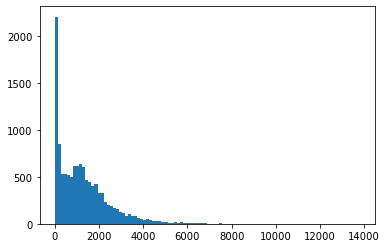

In [13]:
#Following the manual curation of columns, all of the 'good' variables were plotted, for example 'TOTCSQFT'
plot_column(dataset,'TOTCSQFT',n_hist_bins)

In [14]:
#data_cleaning and imputation after the manual analysis of graphs and values using plot_column
#non-sensical values are replaced with the mean column value in the case of continous values (e.g., TOTCSQFT)
#non-sensical values are replaced with the median column value in the case of discrete values (e.g., ACROOMS)

#clean 'TOTCSQFT'
dataset=clean_column(dataset,'TOTCSQFT',False,0)

mean_replace_list=['ACROOMS', 'TEMPHOMEAC', 'TEMPNITEAC', 'TEMPGONEAC']

#clean all entries in mean_replace_list
for col in mean_replace_list:
    dataset=clean_column(dataset,col,False,-2)
    
median_replace_list=['BEDROOMS', 'HEATROOM', 'USECENAC', 'WASHLOAD','DRYRFUEL','CENACHP', 'WELLPUMP', 
                    'SWIMPOOL', 'PRKGPLC1', 'MAINTAC', 'PELHOTWA', 'STUDIO', 'THERMAINAC', 'NAPTFLRS',
                    'PELAC', 'PROTHERMAC', 'TOPFRONT', 'NOUTLGTNT', 'ACOTHERS', 'FUELH2O', 'PGASHTWA',
                    'KAVALNG', 'DWASHUSE', 'CABLESAT3', 'RNSETEMP', 'PLAYSTA3', 'POOL', 'WASHTEMP', 
                    'TVONWE3', 'TVTYPE3', 'TVAUDIOSYS3', 'COMBOVCRDVD3', 'TVONWD3', 'DVD3', 'OTHERSTB3',
                    'ICE', 'DRYRUSE', 'DIGITSTB3', 'SCALENG', 'VCR3', 'FUELHEAT', 'NUMFREEZ', 'SIZRFRI2',
                    'STORIES', 'FREEZER', 'REFRIGT2']

#clean all entries in median_replace_list
for col in median_replace_list:
    dataset=clean_column(dataset,col,True,-2)

In [15]:
#create a deep copy of the newly cleaned dataset
dataset_cleaned = dataset.copy(deep=True)

#generate training dataset from manually curated columns
training_data=pd.DataFrame(np.c_[dataset_cleaned['TOTCSQFT'],dataset_cleaned['TOTROOMS'],dataset_cleaned['ACROOMS'],dataset_cleaned['NCOMBATH'],dataset_cleaned['TOTHSQFT'],dataset_cleaned['BEDROOMS'],dataset_cleaned['HEATROOM'],dataset_cleaned['TOTSQFT'],dataset_cleaned['NUMCFAN'],dataset_cleaned['USECENAC'],dataset_cleaned['WASHLOAD'],dataset_cleaned['TEMPHOMEAC'],dataset_cleaned['TEMPNITEAC'],dataset_cleaned['TEMPGONEAC'],dataset_cleaned['DRYRFUEL'],dataset_cleaned['TVCOLOR'],dataset_cleaned['CENACHP'],dataset_cleaned['WELLPUMP'],dataset_cleaned['OTHROOMS'],dataset_cleaned['TYPEHUQ'],dataset_cleaned['SWIMPOOL'],dataset_cleaned['PRKGPLC1'],dataset_cleaned['MAINTAC'],dataset_cleaned['ELWATER'],dataset_cleaned['PELHOTWA'],dataset_cleaned['STUDIO'],dataset_cleaned['THERMAINAC'],dataset_cleaned['NAPTFLRS'],dataset_cleaned['PELAC'],dataset_cleaned['PROTHERMAC'],dataset_cleaned['DRYER'],dataset_cleaned['TOPFRONT'],dataset_cleaned['NOUTLGTNT'],dataset_cleaned['ACOTHERS'],dataset_cleaned['FUELH2O'],dataset_cleaned['PGASHTWA'],dataset_cleaned['KAVALNG'],dataset_cleaned['DWASHUSE'],dataset_cleaned['CWASHER'],dataset_cleaned['CABLESAT3'],dataset_cleaned['RNSETEMP'],dataset_cleaned['PLAYSTA3'],dataset_cleaned['POOL'],dataset_cleaned['WASHTEMP'],dataset_cleaned['TVONWE3'],dataset_cleaned['NUMFRIG'],dataset_cleaned['TVTYPE3'],dataset_cleaned['UGWATER'], dataset_cleaned['USENG'], dataset_cleaned['TVSIZE3'], dataset_cleaned['TVAUDIOSYS3'], dataset_cleaned['COMBOVCRDVD3'], dataset_cleaned['TVONWD3'], dataset_cleaned['OUTGRILL'], dataset_cleaned['DVD3'], dataset_cleaned['OTHERSTB3'], dataset_cleaned['WINDOWS'], dataset_cleaned['ICE'], dataset_cleaned['DRYRUSE'], dataset_cleaned['ELWARM'], dataset_cleaned['DIGITSTB3'], dataset_cleaned['SCALENG'], dataset_cleaned['VCR3'], dataset_cleaned['FUELHEAT'], dataset_cleaned['NUMFREEZ'], dataset_cleaned['SIZRFRI2'], dataset_cleaned['STORIES'], dataset_cleaned['FREEZER'], dataset_cleaned['REFRIGT2']],columns=['TOTCSQFT','TOTROOMS','ACROOMS','NCOMBATH','TOTHSQFT','BEDROOMS','HEATROOM','TOTSQFT','NUMCFAN','USECENAC','WASHLOAD','TEMPHOMEAC','TEMPNITEAC','TEMPGONEAC','DRYRFUEL','TVCOLOR','CENACHP','WELLPUMP','OTHROOMS','TYPEHUQ','SWIMPOOL','PRKGPLC1', 'MAINTAC', 'ELWATER', 'PELHOTWA', 'STUDIO', 'THERMAINAC','NAPTFLRS', 'PELAC', 'PROTHERMAC', 'DRYER', 'TOPFRONT', 'NOUTLGTNT','ACOTHERS', 'FUELH2O', 'PGASHTWA', 'KAVALNG', 'DWASHUSE', 'CWASHER','CABLESAT3', 'RNSETEMP', 'PLAYSTA3', 'POOL', 'WASHTEMP', 'TVONWE3','NUMFRIG', 'TVTYPE3','UGWATER', 'USENG', 'TVSIZE3', 'TVAUDIOSYS3', 'COMBOVCRDVD3', 'TVONWD3', 'OUTGRILL', 'DVD3', 'OTHERSTB3', 'WINDOWS', 'ICE', 'DRYRUSE', 'ELWARM', 'DIGITSTB3', 'SCALENG', 'VCR3', 'FUELHEAT', 'NUMFREEZ', 'SIZRFRI2', 'STORIES', 'FREEZER', 'REFRIGT2'])

#generate training target dataset
target_data=dataset_cleaned['KWH']

#split the dataset into train and test sets
x_train,x_test,y_train,y_test=train_test_split(training_data,target_data,test_size=test_size)

R2 score: 0.621190


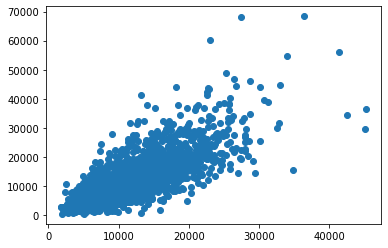

In [16]:
#build, train and evaluate the model
build_train_evaluate_gradient_boosting_regressor(n_estimators,x_train,y_train,x_test,y_test)

In [17]:
#the number of estimators was varied until optimal performance on the test set was achieved (R2 ~= 0.6).
#increasing the number of features would likely improve model performance further